In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd


In [2]:
f_mcc910 = uproot.open("input_files/wc_mcc910_test_files/checkout_MCC9.10_Test_BNB_intrinsic_nue_overlay_wirecell_run4b_marchsample.root")["wcpselection"]
#f_mcc9 = uproot.open("input_files/wc_mcc910_test_files/checkout_prodgenie_bnb_intrinsic_nue_overlay_run4b_FIXED.root")["wcpselection"]
f_mcc9 = uproot.open("/Users/leehagaman/data/merged_wc_glee_rootfiles/checkout_prodgenie_bnb_intrinsic_nue_overlay_run3_PF.root")["wcpselection"]


In [3]:
T_eval_vars = []
for item in f_mcc9["T_eval"].items():
    if "gl" in item[0]: continue
    T_eval_vars.append(item[0])


In [4]:
mcc910_T_BDTvars_df = f_mcc910["T_BDTvars"].arrays("kine_reco_Enu", library="pd")
mcc910_T_KINEvars_df = f_mcc910["T_KINEvars"].arrays("kine_reco_Enu", library="pd")
mcc910_T_eval_df = f_mcc910["T_eval"].arrays(T_eval_vars, library="pd")
mcc910_df = pd.concat([mcc910_T_BDTvars_df, mcc910_T_KINEvars_df, mcc910_T_eval_df], axis=1)

mcc9_T_BDTvars_df = f_mcc9["T_BDTvars"].arrays("kine_reco_Enu", library="pd")
mcc9_T_KINEvars_df = f_mcc9["T_KINEvars"].arrays("kine_reco_Enu", library="pd")
mcc9_T_eval_df = f_mcc9["T_eval"].arrays(T_eval_vars, library="pd")
mcc9_df = pd.concat([mcc9_T_BDTvars_df, mcc9_T_KINEvars_df, mcc9_T_eval_df], axis=1)

print("len(mcc910_df):", len(mcc910_df))
print("len(mcc9_df):", len(mcc9_df))
print("len(mcc9_no_prop_df):", len(mcc9_no_prop_df))


len(mcc910_df): 51507
len(mcc9_df): 148962


<Figure size 1000x800 with 0 Axes>

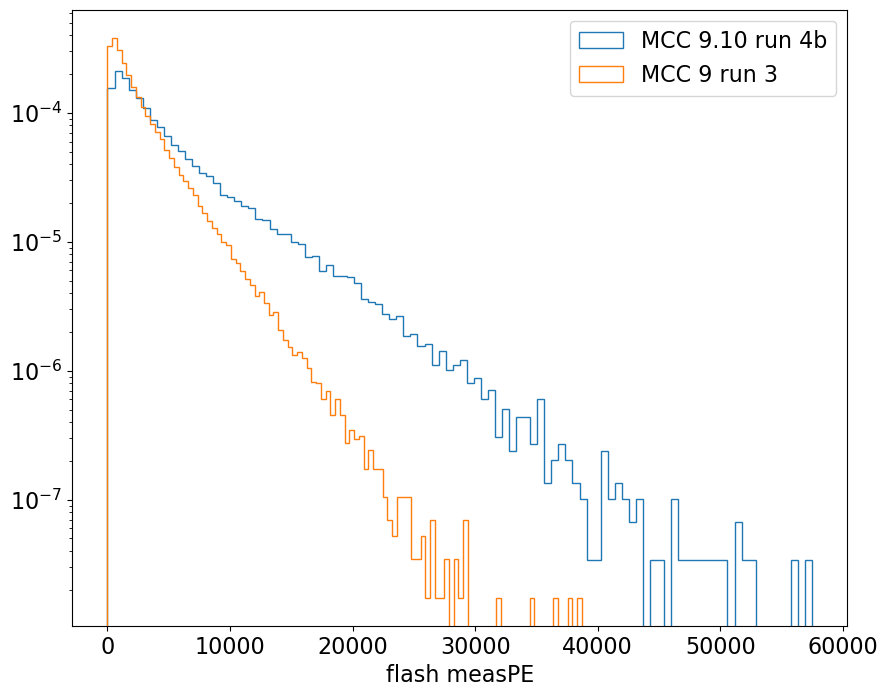

In [5]:
plt.figure(figsize=(10, 8))

matched_mcc9_arr = mcc9_df["flash_measPe"].to_numpy()
matched_mcc910_arr = mcc910_df["flash_measPe"].to_numpy()



plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10, 8))
plt.hist(matched_mcc910_arr, histtype="step", bins=100, density=True, label="MCC 9.10 run 4b")
plt.hist(matched_mcc9_arr, histtype="step", bins=100, density=True, label="MCC 9 run 3")
plt.xlabel("flash measPE")
plt.yscale("log")
plt.legend()
plt.show()

